In [21]:
import torch
from torchvision import datasets, transforms
import helper
from torch import optim
from torch import nn

#print(help(transforms.Compose))
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

trainset = datasets.FashionMNIST('~/.pytorch/F_MINIST_data/', download = True, train = True, transform = transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size = 64, shuffle = True)

testset = datasets.FashionMNIST('~/.pytorch/F_MINIST_data/', download = True, train = True, transform = transform)
testloader = torch.utils.data.DataLoader(testset, batch_size = 64, shuffle = True)

torch.Size([64, 1, 28, 28])
tensor([1, 1, 0, 8, 2, 7, 0, 1, 2, 4, 7, 5, 9, 7, 5, 4, 1, 5, 3, 9, 4, 9, 6, 5,
        0, 9, 0, 5, 5, 3, 2, 5, 7, 7, 2, 2, 3, 1, 6, 3, 8, 3, 4, 3, 2, 6, 3, 6,
        7, 5, 6, 3, 4, 3, 1, 0, 9, 4, 1, 9, 8, 4, 1, 7])


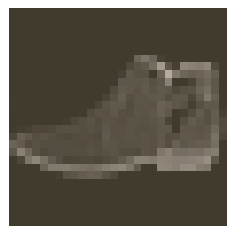

In [25]:
images, labels = next(iter(trainloader))
helper.imshow(image[0,:])
print(image.shape)
print(label)

In [42]:
n_input = 784
n_hiddens = [128, 64, 32, 16]
n_output = 10

model = nn.Sequential(nn.Linear(n_input, n_hiddens[0]),
                      nn.ReLU(),
                      nn.Linear(n_hiddens[0], n_hiddens[1]),
                      nn.ReLU(),
                      nn.Linear(n_hiddens[1], n_hiddens[2]),
                      nn.ReLU(),
                      nn.Linear(n_hiddens[2], n_output),
                      nn.LogSoftmax(dim = 1))

# update weights
optimizer = optim.SGD(model.parameters(), lr = 0.1)
# epoch
epoch = 5
train_error = 0
for i in range(epoch):
    train_error = 0
    for images, labels in trainloader:
        optimizer.zero_grad()
        images = images.view(images.shape[0], -1)
        out = model(images)#fordward
        loss = criterion(out, labels)#loss
        loss.backward()# backward pass, get gradients
        optimizer.step()
        
        train_error += loss.item()
    else:
        print(f"Training loss: {train_error/len(trainloader)}")

#Training loss: 0.19940960203120703

Training loss: 0.6891569720148277
Training loss: 0.429375305819486
Training loss: 0.382467757902547
Training loss: 0.3532315382618767
Training loss: 0.33202819794670607
Training loss: 0.3137695399015697
Training loss: 0.2972998163545691
Training loss: 0.2873950766792684
Training loss: 0.27678892258673843
Training loss: 0.2664976475208299
Training loss: 0.25791765599330857
Training loss: 0.2502226885606739
Training loss: 0.2447619579557671
Training loss: 0.23535200916151247
Training loss: 0.22929442511883372
Training loss: 0.22451320257998986
Training loss: 0.21663288299494715
Training loss: 0.21077434170538428
Training loss: 0.20605204915647696
Training loss: 0.19940960203120703


torch.Size([1, 28, 28])
torch.Size([1, 784])


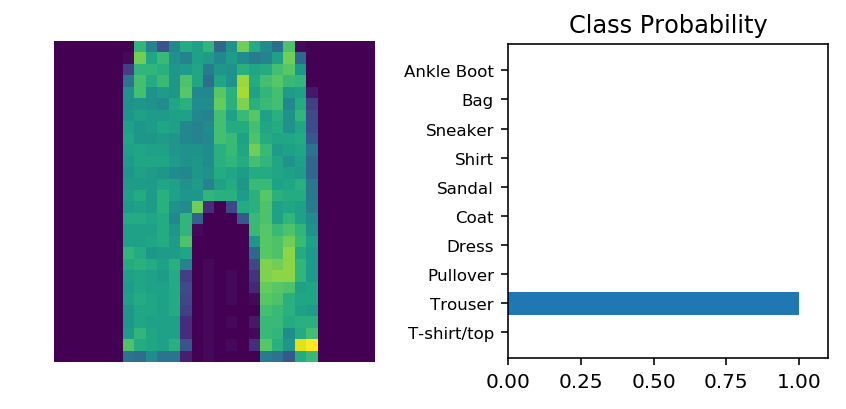

In [48]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper

images, labels = next(iter(testloader))
img = images[0]
print(img.shape)
img = img.view(img.shape[0], -1)
print(img.shape)
out = model(img)
ps = torch.exp(out)

helper.view_classify(img.resize_(1, 28, 28), ps, version = 'Fashion')
